## Code for plotting secondary structure from NMR alongside that from calculated chemical shifts from simulations
This script takes three input files; two are csv files that contain secondary chemical shifts back-calculated from simulations using SPARTA+, and the third is a text file that contains pre-computed secondary chemical shifts using experimental NMR data and the ncIDP algorithm. 'fixedC' and 'flexC' reflect all-atom simulations in which the C-terminal helix of SERF was held rigid (fixedC) or allowed to sample freely (flexC). Generates Figures 2A and S1C.

In [16]:
## import packages ##

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## load alpha and beta carbon chemical shifts calculated from simulations (using SPARTA+) ##
# datasets should contain (Ca - Ca,ref) and (Cb - Cb,ref) in columns 1 and 2

# "fixedC" dataset is from simulations of SERF with rigid C-terminal helix (positive control)
fixedC = np.loadtxt('SPARTAplus_average_secondary_chemical_shifts_fixedC.csv', delimiter = ',')

# "flexC" dataset is from simulations of SERF with all residues allowed to sample
flexC = np.loadtxt('SPARTAplus_average_secondary_chemical_shifts.csv', delimiter = ',')

# load experimental dataset of pre-calculated secondary structure values 
exp_ncIDP = np.loadtxt('ncIDP_SERF_ssp.txt')

In [3]:
## calculate (Ca - Ca,ref) - (Cb - Cb,ref) using columns 1 (Ca - Ca,ref) and column 2 (Cb - Cb,ref) ##

diff_diff_fixed = fixedC[:,0] - fixedC[:,1]
diff_diff_flex = flexC[:,0] - flexC[:,1]

# remove capping residues
fixed_nocaps = diff_diff_fixed[1:]
fixed_nocaps = fixed_nocaps[:-1]

flex_nocaps = diff_diff_flex[1:]
flex_nocaps = flex_nocaps[:-1]

# define residues
residue = np.arange(1, 69, 1)

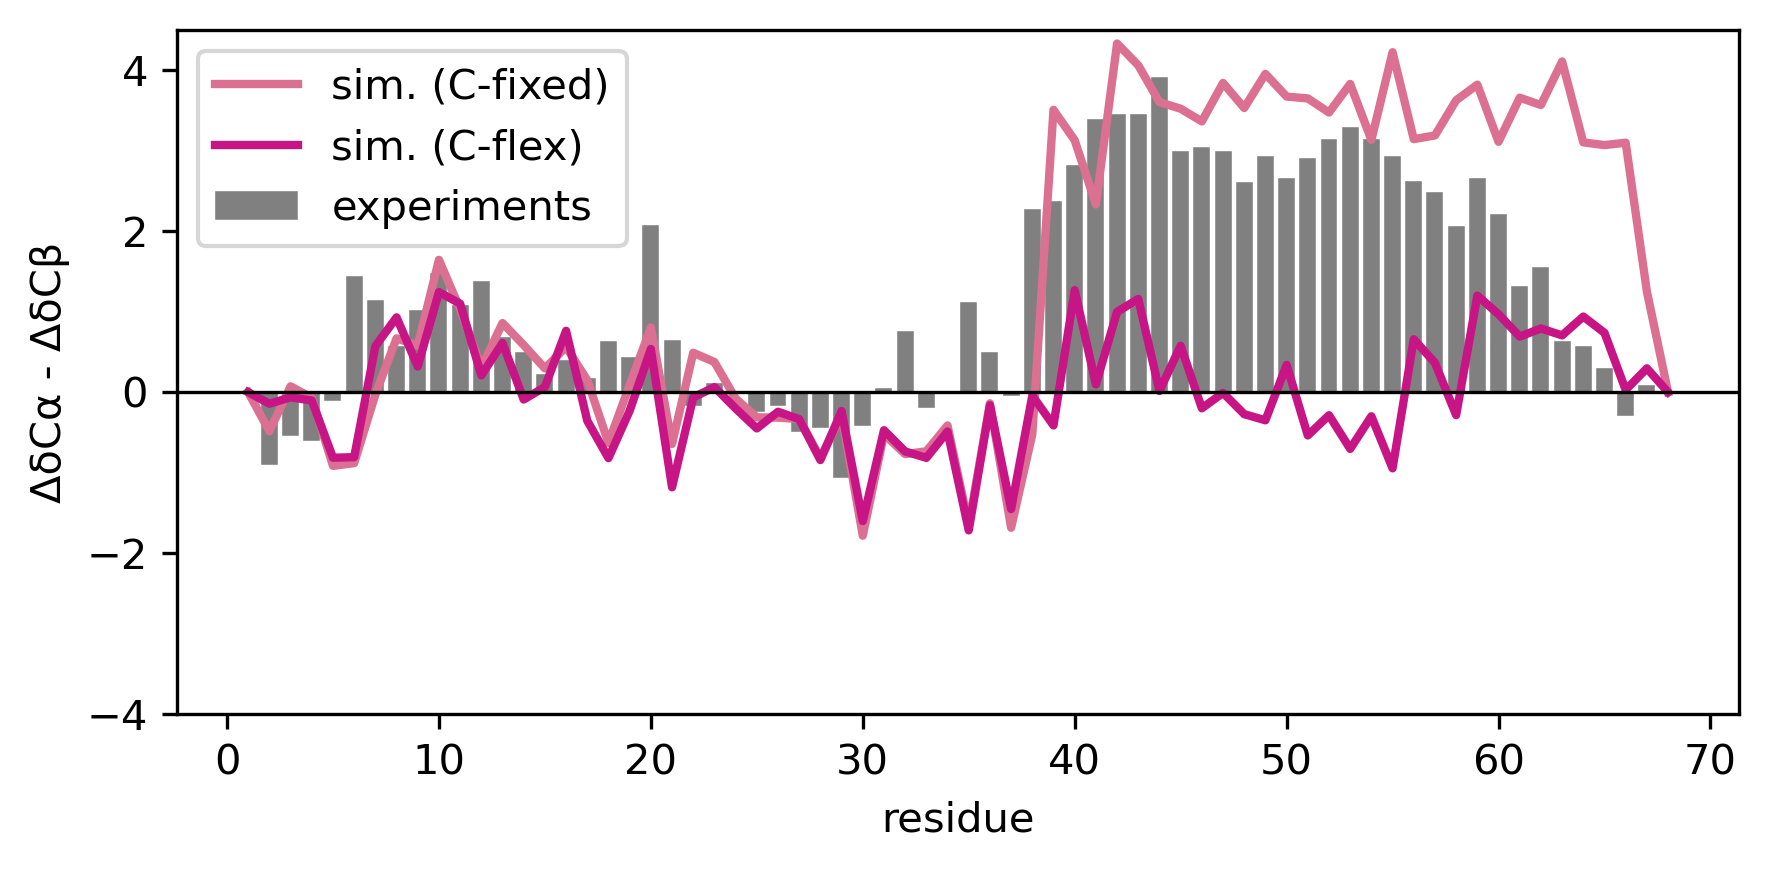

In [8]:
## plot experimental and simulated secondary chemical shifts - Generates Figure 2B ##
plt.figure(figsize = (6,3), dpi = 300)

plt.bar(exp_ncIDP[:,0], exp_ncIDP[:,1], color = 'grey', edgecolor = 'white', linewidth = 0.1, label = 'experiments')
plt.plot(residue, fixed_nocaps, color = 'palevioletred', linewidth = 2, label = 'sim. (C-fixed)')
plt.plot(residue, flex_nocaps, color = 'mediumvioletred', linewidth = 2, label = 'sim. (C-flex)')

plt.ylim([-4, 4.5])
plt.xlabel('residue')
plt.ylabel('ΔδCα - ΔδCβ')

plt.axhline(y = 0, lw = 0.8, color = 'k')

plt.legend(loc = 'best')

plt.tight_layout()

# UNCOMMENT below to save figure as PDF
#plt.savefig('Figure_2A_secondary_structure.pdf', format = 'pdf', dpi = 300)
plt.show()


In [7]:
## load DSSP alpha-helix profile from simulations for comparison ##

helix_dssp = np.loadtxt('SERF_dssp_prof.txt')

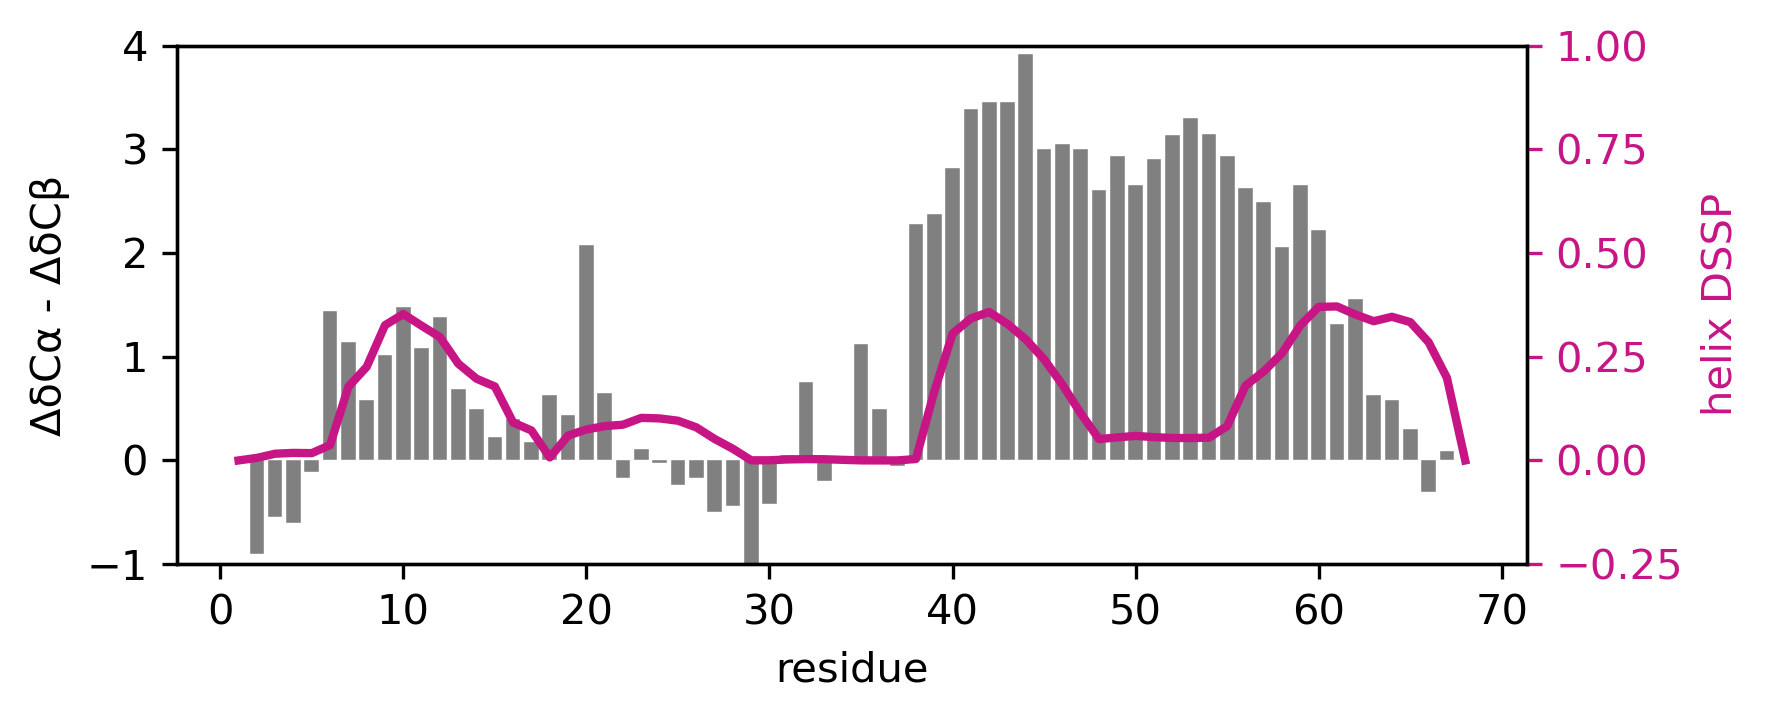

In [15]:
## plot experimental secondary chemical shifts and DSSP helix profile from simulations - Generates Figure S1C ##
plt.figure(num = None, figsize = (6, 2.5), dpi = 300, facecolor = 'w', edgecolor = 'k')
ax = plt.gca()
ax2 = ax.twinx()

ax.bar(exp_ncIDP[:,0], exp_ncIDP[:,1], color = 'grey', edgecolor = 'white', linewidth = 0.1, label = 'experiments')
ax2.plot(helix_dssp[0], helix_dssp[1], color = 'mediumvioletred', linewidth = 2)

ax2.set_ylim([-0.25, 1])
ax.set_ylim([-1, 4])


ax.set_xlabel('residue')

ax.set_ylabel('ΔδCα - ΔδCβ')
ax2.set_ylabel('helix DSSP', color = 'mediumvioletred')
ax2.tick_params(axis = 'y', colors = 'mediumvioletred')

plt.tight_layout()

# UNCOMMENT below to save figure as PDF
#plt.savefig('Figure_S1C_secondary_structure.pdf', format = 'pdf', dpi = 300)
plt.show()